<h1><center>Análise Exploratória de Dados</center></h1>
<h3><center>Análise da base para a ia feita no forms</center></h3>

***

Datasets: 
* Incluses.xlsx

Conteúdo deste notebook:
1. Imports
1. leitura da planilha com os dados obitidos do forms
1. Correções da base
    1. Corrigindo valores na coluna 'Gênero'
    1. Corrigindo valores na coluna 'Nível de Escolaridade'
    1. Corrigindo valores na coluna 'Preferência por Cursos'
    1. Corrigindo valores na coluna 'Qual é a sua situação diante ao mercado de trabalho?'
1. Incluímos no formulário uma pergunta para identificar se as pessoas pertencem à comunidade LGBTQIA+, já que nosso aplicativo é voltado para esse público.
    1. Removendo as colunas
    1. Renomeando as colunas
    1. Filtrando apenas as respostas "Sim"
1. Vendo a descrição do dataFrame (usuando o .describe())
1. Definindo o pré-processador para transformar colunas categóricas em numéricas
    1. Gerando um gráfico de correlação
    1. Análise do que teve mais correlação
        1. Vendo a relação entre 'Faixa Etária' e 'Situação no Mercado de Trabalho'
        1. Vendo a relação entre 'Faixa Etária' e 'Escolaridade'
        1. Vendo a relação entre 'Identidade de Gênero' e 'Escolaridade'
        1. Vendo a relação entre 'Usa Redes Sociais?' e 'Escolaridade'
1. Gerando um Relatório de Perfil do DataFrame
1. Gerando o excel "incluses_tratado.xlsx" com os tratamentos que foram feitos.

## Imports

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OrdinalEncoder
from ydata_profiling import ProfileReport

c:\Users\lucalucareli-ieg\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### leitura da planilha com os dados obitidos do forms

In [2]:
df_incluses = pd.read_excel("./Incluses.xlsx")
display(df_incluses.head(3))

,Id,Hora de início,Hora de conclusão,Email,Nome,Você participa da comunidade LGBTQIA+,Idade,Gênero,Orientação Sexual,Localização,Nível de Escolaridade,Você usa aplicativos para procurar oportunidades de emprego?,Preferência por Cursos,Coluna1,Você já sentiu desafios para entrar no mercado de trabalho devido ao seu gênero,Você tem interesse em empreender?,Qual é a sua situação diante ao mercado de trabalho?,"Você usa redes sociais (exemplo: X, Facebook, Instagram, Youtube)",Com quais finalidades você usaria o Aplicativo Incluses
0,2,2024-08-27 12:15:29,2024-08-27 12:15:41,anonymous,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,2024-08-28 14:21:47,2024-08-28 14:22:06,anonymous,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,2024-08-30 07:19:42,2024-08-30 07:22:12,anonymous,NaN,Sim,Menos de 18 anos,Mulher cisgênero,Homossexual,Região Sudeste,Ensino Fundamental completo,Sim,Prefiro cursos online,NaN,Sim,Não,Empregado (a),Sim,Todos acima


#### Correções da base

In [3]:
# Corrigindo valores na coluna 'Gênero'
df_incluses['Gênero'] = df_incluses['Gênero'].replace({
    "Geladeira Eletrolux de duas portas com gelo para água ": "Outra",
    "Mulher transgênero": "transgênero",
    "Homem transgênero": "transgênero"
    })

# Corrigindo valores na coluna 'Nível de Escolaridade'
df_incluses['Nível de Escolaridade'] = df_incluses['Nível de Escolaridade'].replace({
    "Ensino Médio completo": "Ensino Médio completo ou cursando",
    "Ensino Superior completo": "Ensino Superior completo ou cursando",  
    "Ensino Superior completo ou cursando\xa0": "Ensino Superior completo ou cursando",  
    "Ensino Médio completo": "Ensino Médio completo ou cursando",
    "Ensino Fundamental completo": "Ensino Fundamental completo ou cursando"
})

# Corrigindo valores na coluna 'Preferência por Cursos'
df_incluses['Preferência por Cursos'] = df_incluses['Preferência por Cursos'].replace({
    "Não tenho preferência, pode ser online ou presencial": "Não tenho preferência, pode ser on-line ou presencial",
    "Prefiro cursos online": "Prefiro cursos on-line"
})

# Corrigindo valores na coluna 'Qual é a sua situação diante ao mercado de trabalho?'
df_incluses['Qual é a sua situação diante ao mercado de trabalho?'] = df_incluses['Qual é a sua situação diante ao mercado de trabalho?'].replace({
    "  Desempregado (a)": "Desempregado (a)",
    "Autônomo (a)": "Desempregado (a)",
    "  Empregado (a)": "Empregado (a)",
})


#### Incluímos no formulário uma pergunta para identificar se as pessoas pertencem à comunidade LGBTQIA+, já que nosso aplicativo é voltado para esse público.

In [4]:
# Removendo as colunas que não serão utilizadas na análise
df_incluses = df_incluses.drop(columns=['Id', 'Email', 'Nome', 'Coluna1',"Hora de início", "Hora de conclusão"])

# Renomeando as colunas para facilitar a utilização na análise
df_incluses.columns = [
    "Participante da Comunidade LGBTQIA+", 
    "Faixa Etária", 
    "Identidade de Gênero", 
    "Orientação Sexual", 
    "Cidade/Estado", 
    "Escolaridade", 
    "Usa Apps para Oportunidades de Emprego?", 
    "Preferência de Cursos", 
    "Desafios de Emprego por Gênero", 
    "Interesse em Empreender", 
    "Situação no Mercado de Trabalho", 
    "Usa Redes Sociais?", 
    "Finalidade do Uso do App Incluses"
]

# Filtrando apenas as respostas "Sim" para a coluna "Participante da Comunidade LGBTQIA+"
df_incluses = df_incluses[df_incluses['Participante da Comunidade LGBTQIA+'] == 'Sim']

# Corrigindo o índice após a filtragem
df_incluses.reset_index(drop=True, inplace=True)

# Mostrando o DataFrame
display(df_incluses.head(5))

,Participante da Comunidade LGBTQIA+,Faixa Etária,Identidade de Gênero,Orientação Sexual,Cidade/Estado,Escolaridade,Usa Apps para Oportunidades de Emprego?,Preferência de Cursos,Desafios de Emprego por Gênero,Interesse em Empreender,Situação no Mercado de Trabalho,Usa Redes Sociais?,Finalidade do Uso do App Incluses
0,Sim,Menos de 18 anos,Mulher cisgênero,Homossexual,Região Sudeste,Ensino Fundamental completo ou cursando,Sim,Prefiro cursos on-line,Sim,Não,Empregado (a),Sim,Todos acima
1,Sim,Menos de 18 anos,Mulher cisgênero,Homossexual,Região Sudeste,Ensino Fundamental completo ou cursando,Tenho interesse,"Não tenho preferência, pode ser on-line ou pre...",Sim,Não,Empregado (a),Sim,Não usaria o app
2,Sim,Menos de 18 anos,Mulher cisgênero,Pansexual,Região Norte,Ensino Fundamental completo ou cursando,Não,"Não tenho preferência, pode ser on-line ou pre...",Não,Talvez,Empregado (a),Sim,Fazer cursos de qualificação
3,Sim,Menos de 18 anos,Mulher cisgênero,Bissexual,Região Sudeste,Ensino Fundamental completo ou cursando,Não,"Não tenho preferência, pode ser on-line ou pre...",Sim,Não,Empregado (a),Sim,Não usaria o app
4,Sim,Menos de 18 anos,transgênero,Prefiro não informar,Região Sudeste,Nenhum,Não,"Não tenho preferência, pode ser on-line ou pre...",Sim,Sim,Desempregado (a),Sim,Fazer cursos de qualificação


##### Vendo a descrição do dataFrame (usuando o .describe())

In [5]:
# Exibindo a descrição estatística do DataFrame
df_incluses.describe()

,Participante da Comunidade LGBTQIA+,Faixa Etária,Identidade de Gênero,Orientação Sexual,Cidade/Estado,Escolaridade,Usa Apps para Oportunidades de Emprego?,Preferência de Cursos,Desafios de Emprego por Gênero,Interesse em Empreender,Situação no Mercado de Trabalho,Usa Redes Sociais?,Finalidade do Uso do App Incluses
count,47,47,47,47,47,47,47,47,47,47,47,47,47
unique,1,6,6,7,5,4,3,3,2,3,2,2,5
top,Sim,Menos de 18 anos,Mulher cisgênero,Bissexual,Região Sudeste,Ensino Fundamental completo ou cursando,Sim,"Não tenho preferência, pode ser on-line ou pre...",Não,Talvez,Empregado (a),Sim,Todos acima
freq,47,29,20,16,33,18,23,23,29,19,26,44,16


##### Definindo o pré-processador para transformar colunas categóricas em numéricas

Nesta célula, utilizamos o `ColumnTransformer` do Scikit-learn para transformar as colunas categóricas do DataFrame em numéricas. O `OrdinalEncoder` é aplicado permitindo que essas informações sejam integradas em análises quantitativas. 

O parâmetro `remainder='passthrough'` assegura que as colunas que não precisam de transformação sejam mantidas inalteradas.

Em seguida, calculamos a matriz de correlação entre as variáveis, que nos ajudará a entender a força e a direção das relações entre elas. Para visualizar essas correlações, configuramos os tamanhos de fonte e geramos um heatmap, que é exibido ao final.

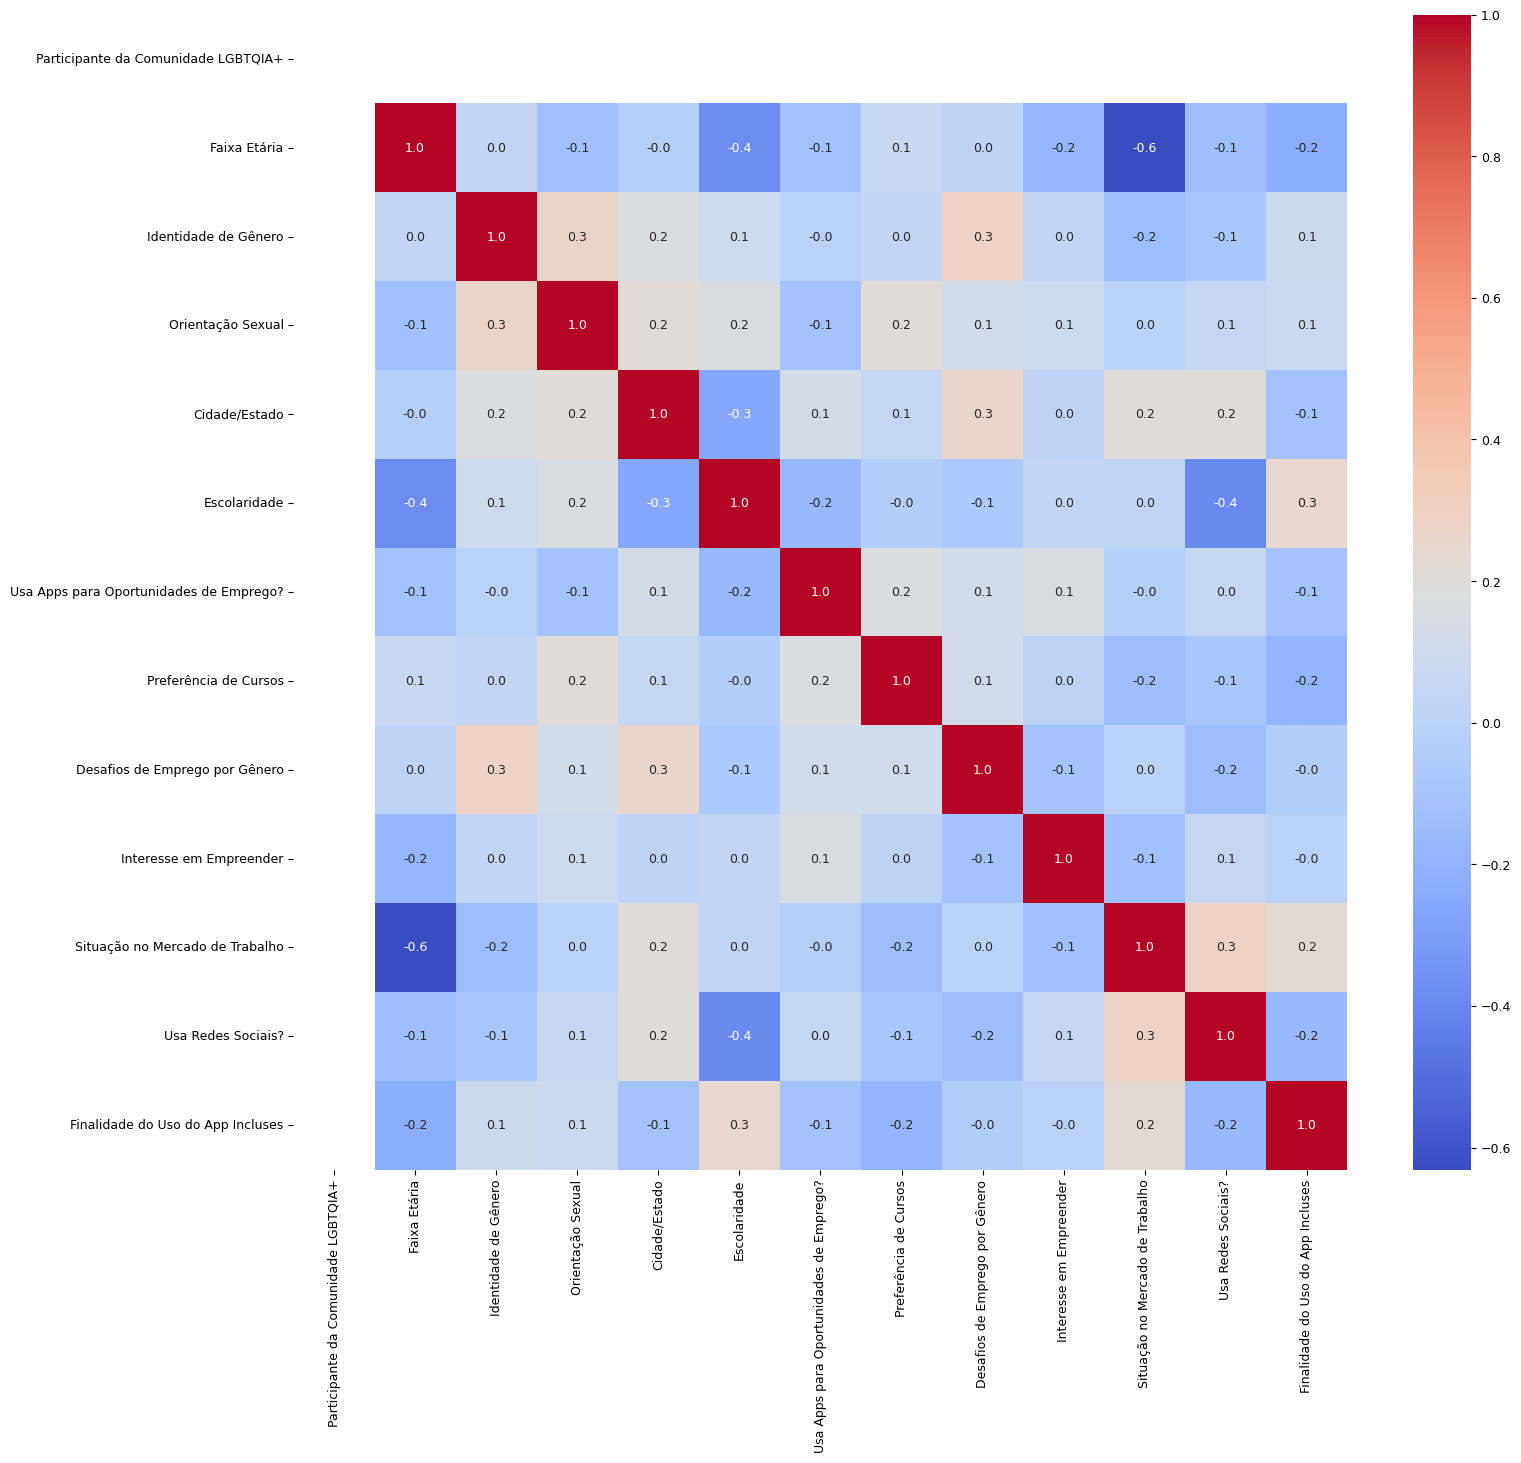

In [6]:
# Definindo o pré-processador para transformar colunas categóricas em numéricas
preprocessador = ColumnTransformer(
    transformers=[
        ('ordinal_encoder', OrdinalEncoder(), make_column_selector(dtype_include=['object', 'bool']))
    ],
    remainder='passthrough',
    verbose_feature_names_out=False 
)

# Aplicando a transformação
df_incluses_in_float = preprocessador.fit_transform(df_incluses)

# Convertendo o resultado de volta para um DataFrame, se necessário
df_incluses_in_float = pd.DataFrame(df_incluses_in_float, columns=df_incluses.columns)

# Calculando a matriz de correlação
matriz_correlacao = df_incluses_in_float.corr()

# Ajustando os tamanhos de fontes
SMALL_SIZE = 9
MEDIUM_SIZE = 11
BIGGER_SIZE = 13

plt.rc('font', size=SMALL_SIZE)          # controla o tamanho padrão do texto
plt.rc('axes', titlesize=SMALL_SIZE)     # tamanho da fonte do título dos eixos
plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos dos eixos
plt.rc('xtick', labelsize=SMALL_SIZE)    # tamanho da fonte das marcações do eixo x
plt.rc('ytick', labelsize=SMALL_SIZE)    # tamanho da fonte das marcações do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.rc('figure', titlesize=BIGGER_SIZE)  # tamanho da fonte do título da figura

# Definindo o tamanho da figura
plt.figure(figsize=(17, 15))

# Gerando o heatmap da matriz de correlação
sns.heatmap(matriz_correlacao, annot=True, fmt=".1f", cmap="coolwarm")

# Exibindo o gráfico
plt.show()

#### Vendo a relação entre 'Faixa Etária' e 'Situação no Mercado de Trabalho'

In [7]:
# Exemplo de DataFrame com colunas 'Faixa Etária' e 'Situação no Mercado de Trabalho'
df_grouped = df_incluses.groupby(['Faixa Etária', 'Situação no Mercado de Trabalho']).size().reset_index(name='Contagem')

# Criando o gráfico de barras empilhadas
fig = px.bar(df_grouped, 
             x='Faixa Etária', 
             y='Contagem', 
             color='Situação no Mercado de Trabalho', 
             title='Situação Trabalhista por Faixa Etária',
             labels={'Contagem': 'Quantidade', 'Faixa Etária': 'Faixa Etária'},
             barmode='stack')

fig.show()

#### Vendo a relação entre 'Faixa Etária' e 'Escolaridade'

In [8]:
# Exemplo de DataFrame com colunas 'Faixa Etária' e 'Escolaridade'
df_grouped = df_incluses.groupby(['Faixa Etária', 'Escolaridade']).size().reset_index(name='Contagem')

# Criando o gráfico de barras empilhadas
fig = px.bar(df_grouped, 
             x='Faixa Etária', 
             y='Contagem', 
             color='Escolaridade', 
             title='Escolaridade por Faixa Etária',
             labels={'Contagem': 'Quantidade', 'Faixa Etária': 'Faixa Etária'},
             barmode='stack')

fig.show()

#### Vendo a relação entre 'Identidade de Gênero' e 'Escolaridade'

In [9]:
# Exemplo de DataFrame com colunas 'Identidade de Gênero' e 'Escolaridade'
df_grouped = df_incluses.groupby(['Identidade de Gênero', 'Escolaridade']).size().reset_index(name='Contagem')

# Criando o gráfico de barras empilhadas
fig = px.bar(df_grouped, 
             x='Identidade de Gênero', 
             y='Contagem', 
             color='Escolaridade', 
             title='Escolaridade por Identidade de Gênero',
             labels={'Contagem': 'Quantidade', 'Identidade de Gênero': 'Identidade de Gênero'},
             barmode='stack')

fig.show()

#### Vendo a relação entre 'Usa Redes Sociais?' e 'Escolaridade'

In [10]:
# Exemplo de DataFrame com colunas 'Usa Redes Sociais?' e 'Escolaridade'
df_grouped = df_incluses.groupby(['Usa Redes Sociais?', 'Escolaridade']).size().reset_index(name='Contagem')

# Criando o gráfico de barras empilhadas
fig = px.bar(df_grouped, 
             x='Usa Redes Sociais?', 
             y='Contagem', 
             color='Escolaridade', 
             title='Escolaridade por Usa Redes Sociais?',
             labels={'Contagem': 'Quantidade', 'Usa Redes Sociais?': 'Usa Redes Sociais?'},
             barmode='stack')

fig.show()

##### Gerando um Relatório de Perfil do DataFrame

Nesta célula, estamos utilizando a biblioteca `ydata_profiling` para criar um relatório detalhado sobre o DataFrame `df_incluses`. O `ProfileReport` nos permite explorar as características dos dados de forma abrangente, fornecendo estatísticas descritivas e visualizações úteis.

As configurações do relatório incluem:

- **Ordenação**: O parâmetro `sort=None` define que as variáveis não serão ordenadas por padrão.
- **Estilo HTML**: O relatório é configurado para ter largura total (`full_width`) para melhor visualização.
- **Barra de Progresso**: A barra de progresso é desativada (`progress_bar=False`) para um processamento mais silencioso.
- **Cálculo de Correlações**: As correlações são calculadas apenas para os métodos "phi_k" e "cramers", enquanto os métodos "pearson", "spearman" e "kendall" são desativados. Isso permite uma análise focada nas correlações mais relevantes para os dados em questão.
- **Modo Exploratória**: O parâmetro `explorative=True` habilita análises exploratórias adicionais no relatório.
- **Título**: O relatório é intitulado "Profiling Report".

Por fim, o relatório gerado é salvo como um arquivo HTML chamado "incluses.html", permitindo fácil acesso e compartilhamento dos resultados da análise.

In [11]:
# Criando um relatório de perfil do DataFrame 'df_incluses'
profile_report = ProfileReport(
    df_incluses,  # O DataFrame a ser analisado
    sort=None,  # Não ordenar as variáveis por padrão
    html={  # Configurações para a saída HTML do relatório
        "style": {"full_width": True}  # Habilita a largura total para melhor visualização
    }, 
    progress_bar=False,  # Desativa a barra de progresso durante a geração do relatório
    correlations={  # Configurações para calcular correlações entre variáveis
        "auto": {"calculate": True},  # Calcula correlações automaticamente
        "pearson": {"calculate": False},  # Desativa o cálculo da correlação de Pearson
        "spearman": {"calculate": False},  # Desativa o cálculo da correlação de Spearman
        "kendall": {"calculate": False},  # Desativa o cálculo da correlação de Kendall
        "phi_k": {"calculate": True},  # Habilita o cálculo da correlação phi_k
        "cramers": {"calculate": True},  # Habilita o cálculo da correlação de Cramér
    },
    
    explorative=True,  # Ativa análises exploratórias adicionais no relatório
    title="Profiling Report"  # Define o título do relatório
)

# Salva o relatório gerado como um arquivo HTML chamado "incluses.html"
profile_report.to_file("incluses.html")

##### Gerando o excel "incluses_tratado.xlsx" com os tratamentos que foram feitos.

In [12]:
df_incluses.to_excel('incluses_tratado.xlsx', index=False)